In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]
%matplotlib inline

In [8]:
#Reading input data

data = pd.read_csv('pred/final.csv')
regr_pred = pd.read_csv('pred/predicted-pm25.csv')

| AQI Band | Low Breakpoint | High Breakpoint |
| :--------------: | :----------------: | :-----------------: |
| LOW | 0 | 35.9 |
| MODERATE | 36 | 53.9 |
| HIGH | 54 | 70.9 |
| VERY HIGH |71 | 102 |

In [9]:
##### Classifying AQI based on PM2.5 values
data['BAND'] = pd.cut(data['PM25'],[-1,11.9,23.9,35.9,41.9,47.9,53.9,58.9,64.9,70.9,102],labels=[1,2,3,4,5,6,7,8,9,10])
regr_pred['BAND'] = pd.cut(regr_pred['0'],[-1,11.9,23.9,35.9,41.9,47.9,53.9,58.9,64.9,70.9,102],labels=[1,2,3,4,5,6,7,8,9,10])

In [10]:
gt = data['BAND'].astype('int64')
pred = regr_pred['BAND'].astype('int64')

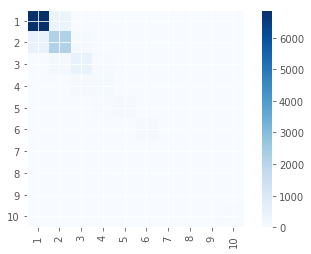

In [12]:
# Calculate confusion matrix for predicted PM25 - XGBoost regression
confusion = confusion_matrix(gt,pred)
columns = ['1','2','3','4','5','6','7','8','9','10']

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,7,8,9], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,7,8,9], columns)
plt.colorbar()

plt.show()

In [13]:
pred.shape

(11206,)

In [14]:
pred[gt.values==pred.values].shape

(9827,)

In [15]:
accuracy_score(gt, pred)

0.8769409245047296

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [18]:
#Multiclass NN Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create MLPClassifier object
mlp = MLPClassifier(activation='logistic', random_state=1234)

In [19]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
# Score the model
multiclass_neural_network_score = mlp.score(X_test, y_test)
multiclass_neural_network_score

0.9610350981558596

In [21]:
# Make predictions using the testing set
mnn_pred = mlp.predict(X_test)

In [22]:
# Calculate probabilities
mnn_prob = mlp.predict_proba(X_test)

In [23]:
# Calculate confusion matrix
confusion_mnn = confusion_matrix(y_test,mnn_pred)

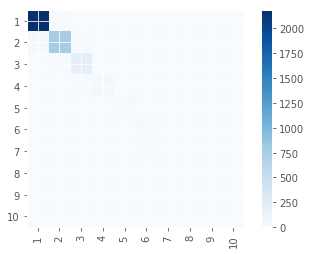

In [24]:
columns = ['1','2','3','4','5','6','7','8','9','10']

plt.imshow(confusion_mnn, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,7,8,9], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,7,8,9], columns)
plt.colorbar()

plt.show()

In [16]:
#Classification model - XGBoost Classifier
y = data['BAND'].astype('int64')
X = data.drop(['BAND'], axis=1)

In [25]:
#XGBoost

from xgboost.sklearn import XGBClassifier

#Fitting XGB regressor 
xboost = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

In [26]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [27]:
xboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [28]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.9997295835586804

In [29]:
#Predict 
xboost_pred = xboost.predict(X_test)

In [31]:
# Calculate confusion matrix
confusion_xgb = confusion_matrix(y_test,xboost_pred)

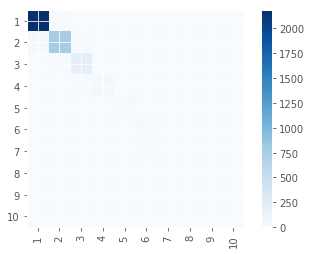

In [32]:
columns = ['1','2','3','4','5','6','7','8','9','10']

plt.imshow(confusion_mnn, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,7,8,9], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,7,8,9], columns)
plt.colorbar()

plt.show()